Primeiramente iremos gerar alguns dados para suprir a necessidade de ter uma variável alvo de "irrigação ligada" ou "irrigação desligada".

Para isto, consideramos a **temperatura**, **humidade** e **precipitação** para definir se uma plantação deve ser irrigada ou não.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import cross_validate, StratifiedKFold, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv('produtos_agricolas.csv')

In [38]:
TEMPERATURE = 25
HUMIDITY = 50
RAINFALL = 100

df['irrigation_on'] = df.apply(lambda x: True if (x['temperature'] >= TEMPERATURE) 
                              and (x['humidity'] < HUMIDITY) 
                              and (x['rainfall'] < RAINFALL)else False, axis=1)

df.rename(columns={'label': 'culture'}, inplace=True)
df.head()

,N,P,K,temperature,humidity,ph,rainfall,culture,irrigation_on
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,False
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,False
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,False
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,False
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,False


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N              2200 non-null   int64  
 1   P              2200 non-null   int64  
 2   K              2200 non-null   int64  
 3   temperature    2200 non-null   float64
 4   humidity       2200 non-null   float64
 5   ph             2200 non-null   float64
 6   rainfall       2200 non-null   float64
 7   culture        2200 non-null   object 
 8   irrigation_on  2200 non-null   bool   
dtypes: bool(1), float64(4), int64(3), object(1)
memory usage: 139.8+ KB


Text(0.5, 1.0, 'Matriz de Correlação')

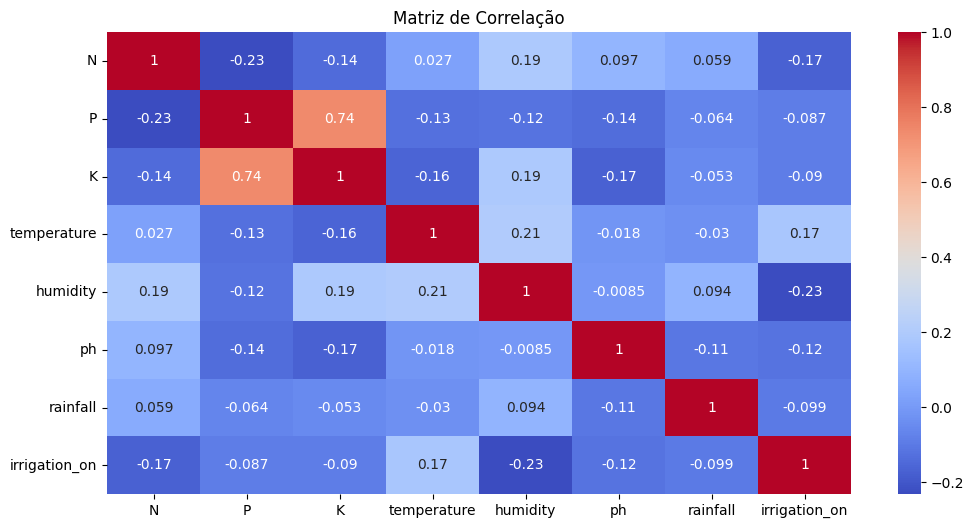

In [44]:
corr = df.select_dtypes(include=['int64', 'float64', 'bool']).corr()

plt.figure(figsize=(12,6))
sns.heatmap(data=corr, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")

In [ ]:
X = df.drop('irrigation_on', axis=1)
y = df['irrigation_on']

In [ ]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('labelEncoder', LabelEncoder()),
    ('estimator', RandomForestClassifier())
])